In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
from datetime import datetime
import seaborn as sns

In [ ]:
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import load_boston

In [ ]:
# import pip
#pip.main(["install", "openpyxl"])

In [ ]:
#read files
s_aut = pd.read_excel('15% uzywane manualna.xlsx')
s_man = pd.read_excel('20% uzywane automatyczna.xlsx')
s_man.head(3)

In [107]:
#test 
s_man.head(2)

,Name,Link,Description,Year,Mileage,Capacity,Fuel,Location,Price,Currency,Model,Brand
0,Mercedes-Benz GLC 220 d 4-Matic,https://www.otomoto.pl/oferta/mercedes-benz-gl...,Mercedes Benz GLC Pakiet AMG full opcja,2019,105000,1950,Diesel,Hajnówka (Podlaskie),200490,PLN,Mercedes-Benz,GLC
1,Jaguar XF 3.0 V6 D S Luxury,https://www.otomoto.pl/oferta/jaguar-xf-jaguar...,Jaguar XF S Premium Luxury PORTFOLIO 3.0 V6 27...,2010,280000,2993,Diesel,Bystrzyca (Lubelskie),48000,PLN,Jaguar,XF


In [120]:
#drop column s_man
del s_man['ooa-1e56i1c']
del s_man['ooa-1dwk0yu href']
del s_man['eploibe0']
del s_man['fin_link_list_a']
del s_man['ooa-16xi4ja href']
del s_man['ooa-a837x4 src']
del s_man['e1b25f6f20']
del s_man['ooa-1ohf0ui']
del s_man['fin_link_list_span_1']
del s_man['ooa-0']
del s_man['ooa-l5u4as href']
del s_man['fin_link_list_a href']
del s_man['e1b25f6f18 src']


#drop column s_man
del s_aut['ooa-1e56i1c']
del s_aut['ooa-1dwk0yu href']
del s_aut['eploibe0']
del s_aut['fin_link_list_a']
del s_aut['ooa-16xi4ja href']
del s_aut['ooa-a837x4 src']
del s_aut['e1b25f6f20']
del s_aut['ooa-1ohf0ui']
del s_aut['fin_link_list_span_1']
del s_aut['ooa-0']
del s_aut['ooa-l5u4as href']
del s_aut['fin_link_list_a href']
del s_aut['e1b25f6f18 src']

#columns headers rename 

s_man.rename(columns={"e1b25f6f6":"Name" ,"e1b25f6f6 href":"Link" , "e1b25f6f12":"Description", 
                      "ooa-1k7nwcr":"Year", "ooa-1k7nwcr 2":"Mileage", "ooa-1k7nwcr 3":"Capacity",
                     "ooa-1k7nwcr 4":"Fuel", "ooa-fzu03x":"Location",
                     "ooa-1bmnxg7":"Price", "fin_link_list_span_1 2":"Currency" },inplace=True)

s_aut.rename(columns={"e1b25f6f6":"Name" ,"e1b25f6f6 href":"Link" , "e1b25f6f12":"Description", 
                      "ooa-1k7nwcr":"Year", "ooa-1k7nwcr 2":"Mileage", "ooa-1k7nwcr 3":"Capacity",
                     "ooa-1k7nwcr 4":"Fuel", "ooa-fzu03x":"Location",
                     "ooa-1bmnxg7":"Price", "fin_link_list_span_1 2":"Currency" },inplace=True)


#Drop PLN and " " from tables 
s_man['Price'] = s_man['Price'].str.replace('PLN', '')
s_man['Price'] = s_man['Price'].str.replace('EUR', '')
s_man['Price'] = s_man['Price'].str.replace(' ', '')
s_aut['Price'] = s_aut['Price'].str.replace('PLN', '')
s_aut['Price'] = s_aut['Price'].str.replace('EUR', '')
s_aut['Price'] = s_aut['Price'].str.replace(' ', '')

#Drop "cm3"  and " "
s_man['Capacity'] = s_man['Capacity'].str.replace(' ', '')
s_man['Capacity'] = s_man['Capacity'].str.replace('cm3', '')
s_aut['Capacity'] = s_aut['Capacity'].str.replace(' ', '')
s_aut['Capacity'] = s_aut['Capacity'].str.replace('cm3', '')

#Drop "km" and " " 
s_man['Mileage'] = s_man['Mileage'].str.replace('km', '')
s_man['Mileage'] = s_man['Mileage'].str.replace(' ', '')

s_aut['Mileage'] = s_aut['Mileage'].str.replace('km', '')
s_aut['Mileage'] = s_aut['Mileage'].str.replace(' ', '')




In [ ]:
#Check numbers of null values 
s_aut.isnull().sum()


In [ ]:
#check unique data if need to remove
s_man['Currency'].unique()

In [ ]:
#Show records where is no data in
s_aut[s_aut['Fuel'].isna()]

In [126]:
#Check dtype and numbers of value in columnss_man.info() s_aut or s_man
s_man.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12633 entries, 0 to 13075
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         12633 non-null  object
 1   Link         12633 non-null  object
 2   Description  12052 non-null  object
 3   Year         12633 non-null  int64 
 4   Mileage      12633 non-null  int64 
 5   Capacity     12633 non-null  int64 
 6   Fuel         12633 non-null  object
 7   Location     12633 non-null  object
 8   Price        12633 non-null  int64 
 9   Currency     12633 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.1+ MB


In [127]:
#Drop the entire row if one of value is NA
s_aut.dropna(subset=['Price', 'Location', 'Fuel', 'Currency'] ,inplace=True)
s_man.dropna(subset=['Price', 'Location', 'Fuel', 'Currency'] ,inplace=True)

#Drop the entire row where Price is 'EUR'
re = s_aut[(s_aut['Currency'] =="EUR")].index
s_aut.drop(re, inplace=True)

re = s_man[(s_man['Currency'] =="EUR")].index
s_man.drop(re, inplace=True)

#Change dtype
s_man['Capacity'] = s_man['Capacity'].astype('int64')
s_man['Mileage'] = s_man['Mileage'].astype('int64')
s_man['Price'] = s_man['Price'].astype('int64')

s_aut['Capacity'] = s_aut['Capacity'].astype('int64')
s_aut['Mileage'] = s_aut['Mileage'].astype('int64')
s_aut['Price'] = s_aut['Price'].astype('int64')




In [129]:
# Add new column with brand and model based on name
s_man['Model'] = s_man['Name'].str.split(' ').str[0]
s_man['Brand'] = s_man['Name'].str.split(' ').str[1]

s_aut['Model'] = s_man['Name'].str.split(' ').str[0]
s_aut['Brand'] = s_man['Name'].str.split(' ').str[1]


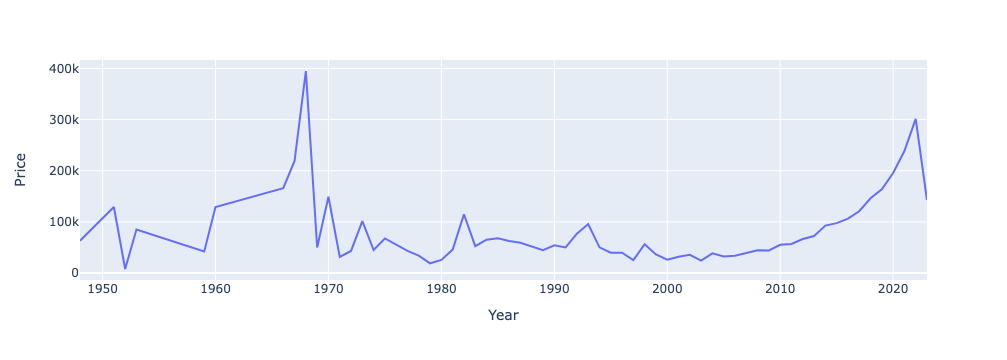

<string>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




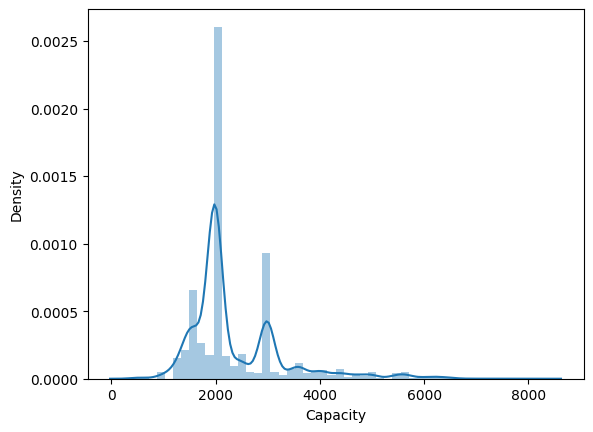

<AxesSubplot:xlabel='Capacity', ylabel='Density'>

In [131]:
#pivot_table years by average by  price cars 
s_man_pivT = s_man.pivot_table(index='Year',  values='Price', aggfunc='mean')
s_man_pivT = pd.DataFrame(s_man_pivT)

#reset index for a chart 
s_man_pivT.reset_index(inplace=True)

#create grup by for a numbers of cars eyach years
fig = px.line(s_man_pivT, x='Year', y='Price')
fig.show()

sns.distplot(s_man['Capacity'] )

In [132]:
#correlation 
s_man.corr()

,Year,Mileage,Capacity,Price
Year,1.000000,-0.598804,-0.312868,0.404236
Mileage,-0.598804,1.000000,0.126137,-0.451414
Capacity,-0.312868,0.126137,1.000000,0.297641
Price,0.404236,-0.451414,0.297641,1.000000


In [113]:
#Create a new df with selected requirements base on Capacity
#s_man2000 = s_man[s_man['Year']>= 2000]
#s_man2000 = s_man[s_man['Capacity'].between(1000,4000) ]


s_man2000 = s_man.query('Year >= 2000')\
        .query('Capacity >= 1000')\
        .query('Capacity <= 4000')\

#heatmap chart 
px.density_heatmap(s_man2000, x='Capacity', y='Year' , z='Price')

MRXLinkPipelineError: Failed at component 'Data cleaning part 2'.